In [1]:
import my_globals
import numpy as np
import pandas as pd
import pickle
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression
from sklearn.naive_bayes import BernoulliNB

In [2]:
DATA_PATH = "/".join([my_globals.DATA_DIR, "feature_space_2.csv"])

data = pd.read_csv(DATA_PATH, encoding= "latin1")

data

,exclaim_freq,mention_count,cap_freq,target,weekday_Mon,weekday_Tue,weekday_Wed,weekday_Thu,weekday_Fri,weekday_Sat,...,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
0,0.016667,1,0.054054,0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.369257,0.902234,0.843665,0.654400,0.270988,0.143495,0.657988,0.250819,0.699023,0.549673
1,0.000000,1,0.346154,4,0.0,0.0,0.0,0.0,0.0,0.0,...,0.373105,0.880642,0.839683,0.644842,0.248449,0.145649,0.678952,0.256067,0.695169,0.582723
2,0.023256,2,0.000000,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.366651,0.919265,0.823635,0.642195,0.273523,0.144533,0.675831,0.242720,0.691284,0.557732
3,0.018182,1,0.033333,4,0.0,0.0,0.0,0.0,0.0,0.0,...,0.387067,0.871422,0.858078,0.659242,0.230774,0.137538,0.669768,0.260504,0.654394,0.567567
4,0.000000,1,0.200000,0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.349750,0.890754,0.856588,0.640455,0.266265,0.144008,0.664871,0.182479,0.673547,0.578468
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0.000000,0,0.085714,4,0.0,1.0,0.0,0.0,0.0,0.0,...,0.403470,0.892415,0.844317,0.658322,0.230153,0.140724,0.674176,0.245013,0.644274,0.593554
99996,0.000000,0,0.093750,0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.371236,0.931314,0.867901,0.689292,0.251416,0.136877,0.688254,0.210944,0.636172,0.580055
99997,0.000000,0,0.000000,0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.384226,0.859212,0.848818,0.645425,0.241821,0.168492,0.644173,0.258664,0.691168,0.577566
99998,0.000000,1,0.081081,0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.383734,0.871749,0.850726,0.667764,0.222664,0.158878,0.672703,0.252130,0.669857,0.583140


In [3]:
# some minor processing after reading
XX = data[[col for col in data.columns if col != "target"]]
# drop sunday
weekday_cols = [col for col in XX.columns if col.startswith("weekday") and not col.endswith("Sun")]
XX[weekday_cols] = XX[weekday_cols].astype(int)

yy = data["target"].astype("category")

X_train, X_test, y_train, y_test = train_test_split(XX, yy, test_size=0.15, random_state=0)

<ipython-input-3-4a2b093b6a78>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  XX[weekday_cols] = XX[weekday_cols].astype(int)


# Naive Bayes

In [10]:
nb = BernoulliNB()

param={'alpha': [10**(n) for n in range(-4, 4)]}

clf=GridSearchCV(nb, param, scoring='accuracy', cv=10, return_train_score=True, verbose=4)
clf.fit(X_train, y_train)

Fitting 10 folds for each of 8 candidates, totalling 80 fits
[CV 1/10] END .alpha=0.0001;, score=(train=0.616, test=0.608) total time=  18.4s
[CV 2/10] END .alpha=0.0001;, score=(train=0.615, test=0.614) total time=  17.8s
[CV 3/10] END .alpha=0.0001;, score=(train=0.616, test=0.608) total time=  17.3s
[CV 4/10] END .alpha=0.0001;, score=(train=0.617, test=0.601) total time=  17.4s
[CV 5/10] END .alpha=0.0001;, score=(train=0.616, test=0.608) total time=  17.4s
[CV 6/10] END .alpha=0.0001;, score=(train=0.615, test=0.616) total time=  17.3s
[CV 7/10] END .alpha=0.0001;, score=(train=0.615, test=0.615) total time=  17.2s
[CV 8/10] END .alpha=0.0001;, score=(train=0.615, test=0.613) total time=  17.3s
[CV 9/10] END .alpha=0.0001;, score=(train=0.615, test=0.614) total time=  17.3s
[CV 10/10] END alpha=0.0001;, score=(train=0.615, test=0.616) total time=  17.7s
[CV 1/10] END ..alpha=0.001;, score=(train=0.616, test=0.608) total time=  17.3s
[CV 2/10] END ..alpha=0.001;, score=(train=0.615

GridSearchCV(cv=10, estimator=BernoulliNB(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]},
             return_train_score=True, scoring='accuracy', verbose=4)

In [4]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

def assess(y_true, y_pred):
    print("confusion matrix:")
    conf_mat = confusion_matrix(y_true, y_pred)
    print(conf_mat)
    print()
    print("accuracy_score:")
    print(accuracy_score(y_true, y_pred))
    print()
    print("classification report:")
    print(classification_report(y_true,y_pred))
    print()
    return conf_mat

Best alpha choice is 0.0001.
Out of sample assessment:

confusion matrix:
[[4948 2539]
 [3236 4277]]

accuracy_score:
0.615

classification report:
              precision    recall  f1-score   support

           0       0.60      0.66      0.63      7487
           4       0.63      0.57      0.60      7513

    accuracy                           0.61     15000
   macro avg       0.62      0.62      0.61     15000
weighted avg       0.62      0.61      0.61     15000




<AxesSubplot: >

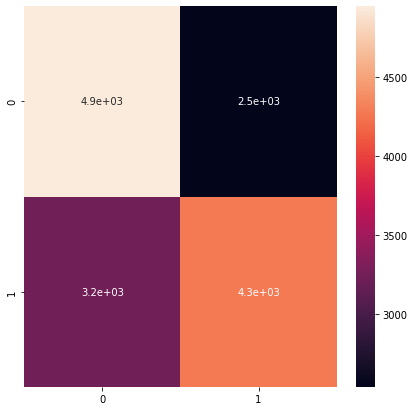

In [16]:
best_alpha = clf.best_params_["alpha"]
print(f"Best alpha choice is {best_alpha}.")
best_nb = clf.best_estimator_

# save model
nb_modelfile = "/".join([my_globals.DATA_DIR, "best_nb.pickle"])
pickle.dump(best_nb, open(nb_modelfile, "wb"))

best_nb.fit(X_train, y_train)
y_pred = best_nb.predict(X_test)

print("Out of sample assessment:")
print()
conf_mat = assess(y_test, y_pred)

fig, ax = plt.subplots(1,1, figsize = [7,7])
sns.heatmap(conf_mat, annot=True, ax = ax)

# Logistic Regression

In [17]:
lr = LogisticRegression(solver="newton-cg")

param={
    "penalty": [None, "l2"],
    "max_iter": [100, 1000]
}

clf=GridSearchCV(lr, param, scoring='accuracy', cv=10, return_train_score=True, verbose=4)
clf.fit(X_train, y_train)

Fitting 10 folds for each of 4 candidates, totalling 40 fits
[CV 1/10] END max_iter=100, penalty=None;, score=(train=nan, test=nan) total time=   0.9s
[CV 2/10] END max_iter=100, penalty=None;, score=(train=nan, test=nan) total time=   0.8s
[CV 3/10] END max_iter=100, penalty=None;, score=(train=nan, test=nan) total time=   0.8s
[CV 4/10] END max_iter=100, penalty=None;, score=(train=nan, test=nan) total time=   0.8s
[CV 5/10] END max_iter=100, penalty=None;, score=(train=nan, test=nan) total time=   0.8s
[CV 6/10] END max_iter=100, penalty=None;, score=(train=nan, test=nan) total time=   0.8s
[CV 7/10] END max_iter=100, penalty=None;, score=(train=nan, test=nan) total time=   0.8s
[CV 8/10] END max_iter=100, penalty=None;, score=(train=nan, test=nan) total time=   0.8s
[CV 9/10] END max_iter=100, penalty=None;, score=(train=nan, test=nan) total time=   0.8s
[CV 10/10] END max_iter=100, penalty=None;, score=(train=nan, test=nan) total time=   0.8s
[CV 1/10] END max_iter=100, penalty=l2

c:\Users\linru\Anaconda3\envs\DL\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
20 fits failed out of a total of 40.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\linru\Anaconda3\envs\DL\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\linru\Anaconda3\envs\DL\lib\site-packages\sklearn\linear_model\_logistic.py", line 1091, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "c:\Users\linru\Anaconda3\envs\DL\lib\site-packages\sklearn\linear_model\_logistic.py", line 55, in _check_so

GridSearchCV(cv=10, estimator=LogisticRegression(solver='newton-cg'),
             param_grid={'max_iter': [100, 1000], 'penalty': [None, 'l2']},
             return_train_score=True, scoring='accuracy', verbose=4)

Best parameters: {'max_iter': 100, 'penalty': 'l2'}.
Out of sample assessment:

confusion matrix:
[[5780 1707]
 [1590 5923]]

accuracy_score:
0.7802

classification report:
              precision    recall  f1-score   support

           0       0.78      0.77      0.78      7487
           4       0.78      0.79      0.78      7513

    accuracy                           0.78     15000
   macro avg       0.78      0.78      0.78     15000
weighted avg       0.78      0.78      0.78     15000




<AxesSubplot: >

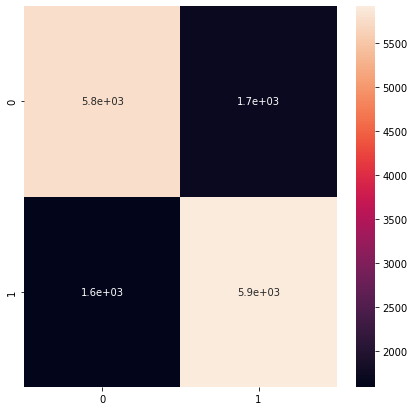

In [18]:
best_params = clf.best_params_
print(f"Best parameters: {best_params}.")
best_lr = clf.best_estimator_

# save model
lr_modelfile = "/".join([my_globals.DATA_DIR, "best_lr.pickle"])
pickle.dump(best_lr, open(lr_modelfile, "wb"))

best_lr.fit(X_train, y_train)
y_pred = best_lr.predict(X_test)

print("Out of sample assessment:")
print()
conf_mat = assess(y_test, y_pred)

fig, ax = plt.subplots(1,1, figsize = [7,7])
sns.heatmap(conf_mat, annot=True, ax = ax)


# Random Forest


In [6]:
rf = RandomForestClassifier(max_features="log2")

param={
    "max_depth": [50, 100],
    "n_estimators": [100, 500]
}

clf=GridSearchCV(rf, param, scoring='accuracy', cv=10, return_train_score=True, verbose=4)
clf.fit(X_train, y_train)

Fitting 10 folds for each of 4 candidates, totalling 40 fits
[CV 1/10] END max_depth=50, n_estimators=100;, score=(train=0.999, test=0.743) total time= 1.7min
[CV 2/10] END max_depth=50, n_estimators=100;, score=(train=0.999, test=0.746) total time= 1.7min
[CV 3/10] END max_depth=50, n_estimators=100;, score=(train=0.999, test=0.742) total time= 1.7min
[CV 4/10] END max_depth=50, n_estimators=100;, score=(train=0.999, test=0.734) total time= 1.8min
[CV 5/10] END max_depth=50, n_estimators=100;, score=(train=0.999, test=0.736) total time= 1.8min
[CV 6/10] END max_depth=50, n_estimators=100;, score=(train=0.999, test=0.750) total time= 1.7min
[CV 7/10] END max_depth=50, n_estimators=100;, score=(train=0.999, test=0.742) total time= 1.7min
[CV 8/10] END max_depth=50, n_estimators=100;, score=(train=0.999, test=0.744) total time= 1.8min
[CV 9/10] END max_depth=50, n_estimators=100;, score=(train=0.999, test=0.745) total time= 1.7min
[CV 10/10] END max_depth=50, n_estimators=100;, score=(tr

GridSearchCV(cv=10, estimator=RandomForestClassifier(max_features='log2'),
             param_grid={'max_depth': [50, 100], 'n_estimators': [100, 500]},
             return_train_score=True, scoring='accuracy', verbose=4)

Best parameters: {'max_depth': 100, 'n_estimators': 500}.
Out of sample assessment:

confusion matrix:
[[5779 1708]
 [1865 5648]]

accuracy_score:
0.7618

classification report:
              precision    recall  f1-score   support

           0       0.76      0.77      0.76      7487
           4       0.77      0.75      0.76      7513

    accuracy                           0.76     15000
   macro avg       0.76      0.76      0.76     15000
weighted avg       0.76      0.76      0.76     15000




<AxesSubplot: >

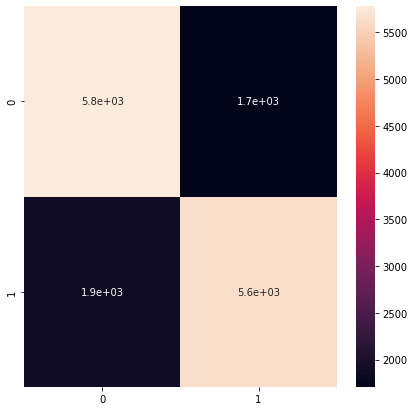

In [7]:
best_params = clf.best_params_
print(f"Best parameters: {best_params}.")
best_rf = clf.best_estimator_

# save model
rf_modelfile = "/".join([my_globals.DATA_DIR, "best_rf.pickle"])
pickle.dump(best_rf, open(rf_modelfile, "wb"))

best_rf.fit(X_train, y_train)
y_pred = best_rf.predict(X_test)

print("Out of sample assessment:")
print()
conf_mat = assess(y_test, y_pred)

fig, ax = plt.subplots(1,1, figsize = [7,7])
sns.heatmap(conf_mat, annot=True, ax = ax)